## Project 2 — Microbial Diversity & Dominance Insight System
Description

This project evaluates the diversity and dominance of microbial species across all samples.
It calculates relative abundance, determines the Shannon diversity index, and identifies the most dominant taxa using vectorized NumPy operations, loops, and conditional expressions.
The final output gives insight into which microbes are most prevalent in the microbial community.##

🧬 Shannon Diversity Index: 7.947
✅ Saved microbial_diversity_report.csv


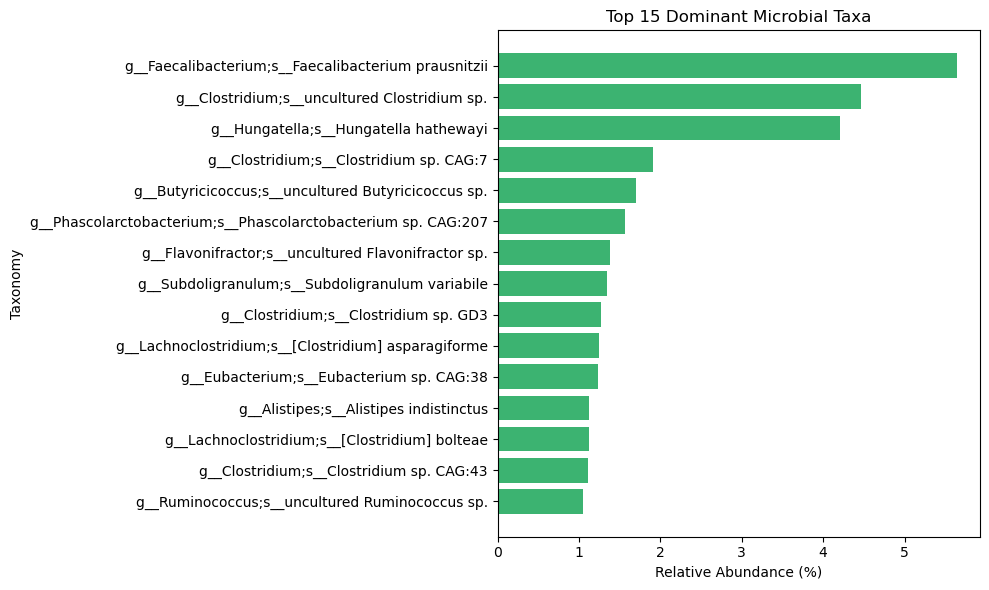

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Micro_Data.csv")

# Extract numeric columns
abundance = df.drop(columns=["Taxonomy"])
total_counts = abundance.sum().sum()

# Relative abundance per taxon
df["Relative_Abundance"] = df.drop(columns=["Taxonomy"]).sum(axis=1) / total_counts * 100

# Shannon diversity index (per taxon distribution)
p = df["Relative_Abundance"] / df["Relative_Abundance"].sum()
shannon_index = -np.sum(p * np.log2(p + 1e-9))

print(f"🧬 Shannon Diversity Index: {shannon_index:.3f}")

# Categorize taxa by relative abundance
median_rel = df["Relative_Abundance"].median()
df["Dominance_Level"] = [
    "Dominant" if x > median_rel else "Rare"
    for x in df["Relative_Abundance"]
]

# Save results
df.to_csv("microbial_diversity_report.csv", index=False)
print("✅ Saved microbial_diversity_report.csv")

# Plot top 15 dominant taxa
top15 = df.nlargest(15, "Relative_Abundance")
plt.figure(figsize=(10,6))
plt.barh(top15["Taxonomy"], top15["Relative_Abundance"], color="mediumseagreen")
plt.gca().invert_yaxis()
plt.title("Top 15 Dominant Microbial Taxa")
plt.xlabel("Relative Abundance (%)")
plt.ylabel("Taxonomy")
plt.tight_layout()
plt.show()
